# Introduction to Multiple Linear Regression

__Linear Regression Learning Objectives__ 
* Multiple Linear Regression Models
* Estimating Multiple Parameters
* Coefficient of Determination/R-squared

__Salmon Learning Objectives__ 
* Multiple Linear Regression Models
* Coefficient of Determination/R-squared

In [2]:
import pandas as pd
from salmon import *
%matplotlib inline
plt.style.use('seaborn')

## Multiple Linear Regression Model
Multiple linear regression models are extremely similar to our simple linear regression models. The only difference is that you are comparing the affects of two or more explanatory variables on a response variable. Let's take a look the multiple linear regression model to solidify this idea:
$$y_i = \hat{\beta_0} + \hat{\beta_1}x_{i1} + \hat{\beta_2}x_{i2} + ... + \hat{\beta_n}x_{in} + \varepsilon_i$$
Where p is the number of explanatory variables. This equation represents the mean population line and predicts the mean response value for a given explanatory value.

### Estimating Parameters
To estimate our parameters, $\beta_0, \beta_1, ... \beta_n$, we will use least squares regression. The equation is almost identical to simple linear regression but it accounts for the new parameters. Remember, in least-squares regression, the aim is to minimize the _sum of squared residuals_:
$$
\begin{align*}
\sum_{i=1}^n e_i^2 &= \sum_{i=1}^n (y_i - \hat y_i)^2 \\
&= \sum_{i=1}^n (y_i - (b_0 + b_1 x_i + b_1 x_i ))^2
\end{align*}
$$

Now, we take the derivative of the equation above, with respect to $b_0, b_1, ... b_n$, set them equal to zero, and then solve for $b_0, b_1, ... b_n$. The last variable we need to estimate is $\sigma^2$ and it is estimated by $s^2$ or the Mean Squared Error (MSE):
$$s^2 = \frac{\Sigma e_i^2}{n-p-1}$$

where $e_i$ are the residuals, n is the number of observations, and p is the number of explanatory variables. While it's good to know the underlining math behind these variables, we will use SALMON to calculate them.

#### Estimating Housing Prices with  with SALMON
For this chapter, we will be looking at the AMES housing dataset. Let's find out how the total living area and the number of bedrooms affect the price of a house. First let's regress separately on total living area and number bedrooms.

In [3]:
ames = pd.read_csv("data/chapter4/AmesHousing.txt", sep="\t")
explanatory = Q("Bedroom AbvGr")
response = Q("SalePrice")
model = LinearModel(explanatory, response)
model.fit(ames)["Coefficients"]

Bedroom AbvGr     13889.495269
Intercept        141151.743026
Name: Coefficients, dtype: float64

In [4]:
explanatory = Q("Gr Liv Area")
response = Q("SalePrice")
model = LinearModel(explanatory, response)
model.fit(ames)["Coefficients"]

Gr Liv Area      111.694001
Intercept      13289.634365
Name: Coefficients, dtype: float64

From our simple linear regression chapters, we know that these models imply that for each single unit increase of a bedroom and living area, the housing price will increase roughly by \$13,889 and \$112, on average. But, by just looking at these models independently, we are not taking into account the full effects of both variables. Now, let's regress on both living area and number of bedrooms. 

In [5]:
bedrooms = Q("Bedroom AbvGr")
living_area = Q("Gr Liv Area")
explanatory = bedrooms + living_area
response = Q("SalePrice")
model = LinearModel(explanatory, response)
model.fit(ames)["Coefficients"]

Bedroom AbvGr   -29149.109660
Gr Liv Area        136.360903
Intercept        59496.235786
Name: Coefficients, dtype: float64

Interestingly, we can see that the number of bedrooms has a negative effect on the housing price and the living area has a positive effect. To fully understand this model, we need to take a deeper look at it and fully interpret it.

### Interpreting Multiple Linear Regression Models
The coefficients of a multiple linear regression model, $\beta_0, \beta_1, ... \beta_n$, are sometimes called _partial regression coefficients_ because each coefficient is responsible for part of the effect on our response variable. It is important to note that these coefficients explain their effect on y when holding all other variables constant. This is why the number of bedrooms had a negative effect on the housing price. 
 <img src='images/chapter4/bed_houses.png'>
If we keep the living area constant but continually increase the number of bedrooms, the house would loose value because there wouldn't be any room for our spaces like a kitchen or a dining room. Conversly, if we keep the number of bedrooms constant but increase the living area the price increases.
<img src='images/chapter4/size_house.png'>
Intuitively, this makes sense because as the home becomes larger and the number of bedrooms is constant, there is more space for the homeowners. 

Formally, we can interpret this model in the following way:

$b_0$: When the living area and number of bedrooms are zero, the price of a house is $59496.23 on average.

$b_1$: Holding the number of bedrooms constant, the price of a house increases by $136, on average, for each square foot increase.

$b_2$: Holding the living area constant, the price of a house decreases by $29,149, on average, for each additional bedroom.

For future interpretations, follow the follow template when interpreting $x_n$:

$b_n$: Holding all other variables constant, (explanatory variable $x_n$) will (increase or decrease) by (value), on average, for each (single unit increase of $x_n$).

#### Coefficient of Determination (R-squared)
A useful metric in multiple linear regression is the Coefficient of Determination or $R^2$. $R^2$ measures the proportion of variability in the response variable caused by the explanatory variables, it is also the correlation (r) squared. So, $R^2$ values of 0 indicate that the response variable can not be predicted using the explanatory variables. While an $R^2$ value of 1 indicates that the response variable can be predicted from the explanatory variables without error; all of our points would lie on the regression line. Any value between zero and one indicate the proporation of variability in the response variable "explained" by the explanatory variables. The Coefficient of Determination can be calculated with the following formula:
$$R^2 = \frac{\Sigma{(\hat{y}_i - \bar{y}})^2}{\Sigma{(y_i - \bar{y}})^2}$$
Where $\hat{y}_i$ is the fitted value, $\bar{y}$ is the mean, and $y_i$ is the observed values.

#### Coefficient of Determination (R-squared) in Salmon
The $R^2$ value can be calculated easily in SALMON. 

In [7]:
bedrooms = Q("Bedroom AbvGr")
living_area = Q("Gr Liv Area")
explanatory = bedrooms + living_area
response = Q("SalePrice")
model = LinearModel(explanatory, response)
model.fit(ames);
model.score()


0.565947828942998

### Significance Testing
After estimating the parameters, it is beneficial to run a hypothesis test on each estimated coefficient. This can determine if the coefficients provide a significant contribution to the model. To do this, we need to test if $\beta_p = 0$ :

$$H_0: \beta_j = 0$$

We can test this by calculating the t statisic:

$$t^* = \frac{b_j}{SE_{b_j}} \sim t_{(n-p)}$$

Then we can look up the corresponding p-value in the t-table with $n - p$ degrees of freedom. If the p-value is less than a given alpha it is statistically significant. Let's check whether or not our coefficients in our Ames housing model are significant using an $\alpha = 0.05$. Remember, you can get the SE, the t-statistic, and the corresponding p value from the output of `fit`.

In [15]:
model.fit(ames)

,Coefficients,SE,t,p
Gr Liv Area,136.360903,2.246764,60.692142,0.000000e+00
Bedroom AbvGr,-29149.109660,1372.135190,-21.243614,2.926484e-93
Intercept,59496.235786,3741.249056,15.902773,0.000000e+00


As we can see, both living area and number of bedrooms have p-values less than 0.05. Formally:

We can conclude that there is a difference in the mean housing price associated with each additional square foot increase, adjusting for the number of bedrooms.

We can conclude that there is a difference in the mean housing price associated with each additional bedroom, adjusting for the living area.

### Confidence Intervals
Just like simple linear regression, we can calculate confidence intervals for multiple linear regression. These confidence intervals can give us a range of values that explain how the true mean of the response is affected for each single unit increase of a given explanatory value. For each coefficient, we can calculate the confidence interval with the following equation:

$$b_p \pm t^*SE_{b_p}$$

where $SE_{b_p} = \frac{s}{\sum(x_{ip} - \bar{x_p})^2}$ 

Let's calculate and interpret the confidence intervals for Ames housing model using SALMON. To do this, you can use the function `slope_confidence_intervals()`. This function defaults to 95% confidence intervals but you can change it but passing in the confidence interval into the `conf` parameter. _e.g._ `slope_confidence_intervals(conf=.8)`

In [17]:
model.slope_confidence_intervals()

,2.5%,97.5%
Gr Liv Area,131.955505,140.766301
Bedroom AbvGr,-31839.557753,-26458.661568
Intercept,52160.488943,66831.982628


For the living area, we are 95% confident that, for each additional square foot, the true mean house price increase between \$132 and \$141, adjusting for the number of bedrooms.

For the number of bedrooms, we are 95% confident that, for each additional bedroom, the true mean house price decreases between \$31840 and \$26459, adjusting for the living area.

### Prediction Intervals
Predicting is one of the main uses of Multiple Linear Regression. With prediction intervals, we can give a range of values that the true response value would be in, with a certain level of confidence. Given a new set of explanatory values, we can calculate a predicted value using our regression formula, with estimated parameter, then give a prediction interval for the true value with a confidence level. A prediction interval can be computed with the following equation:

$$b_p \pm t^*SE_{b_p}$$
or
$$b_p \pm t_{(1-\alpha / 2, n - p)}SE_{b_p}$$


where $SE_{b_p} = \frac{s}{\sum(x_{ip} - \bar{x_p})^2}$

### Polynomial Regression

When looking at a dataset, it may be apparrent that there is __not__ a linear relationship. To account for this, we can using polynomial regression. This changes our model equation to look more this:

$$y_i = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_2}x^2 + ... + \hat{\beta_2}x^h + \varepsilon_i$$

We can increase the degree of the polynomial and in doing so, we are increasing the nonlinear relationship of our model. It is important to note that when introducing polynomial variables, we need to keep the original variables in our equations. For example, if we introduce $x^2$ into our equation, we must keep x in our equation. Additionally, when doing tests of significance, if the polynomial variable is significant and the original variable is not, it is okay to continue our analysis. Let's take a look at our speed of sound dataset again and see if it would benefit from polynomial regression. We can start by plotting a regression line and looking at the residuals.


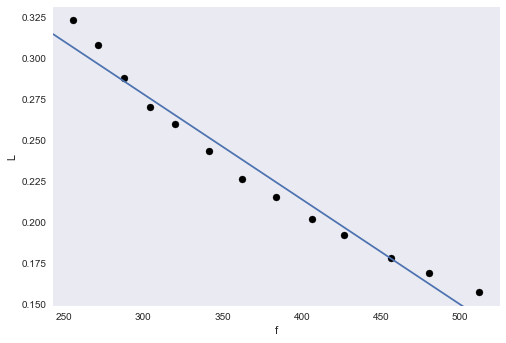

In [10]:
data = pd.read_csv("data/chapter4/speed_of_sound.csv")
explanatory = Q("f")
response = Q("L")
model = LinearModel(explanatory, response)
model.fit(data);
model.plot()

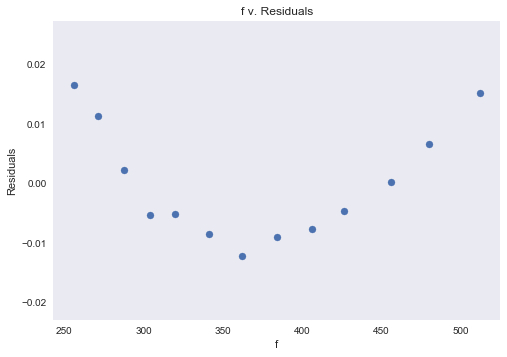

In [11]:
model.residual_plots()

Notice how both the data points on the regression line plot and the residual plot have a parabolic shape. This is a strong indication that the model would greatly benefit from introducing higher polynomial variables. Since the shape is parabolic, let's square our explanatory variable, fit the new polynomial model, and look the plots again.

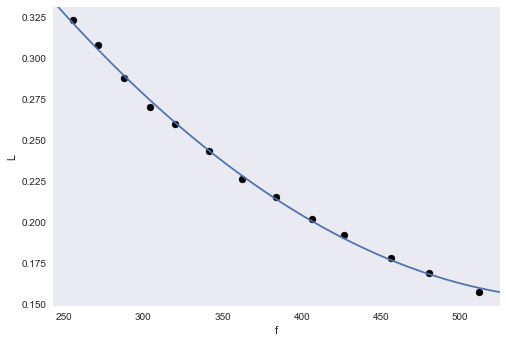

In [13]:
explanatory = Q("f") + Q("f")**2
response = Q("L")
polynomial_model = LinearModel(explanatory, response)
polynomial_model.fit(data);
polynomial_model.plot()

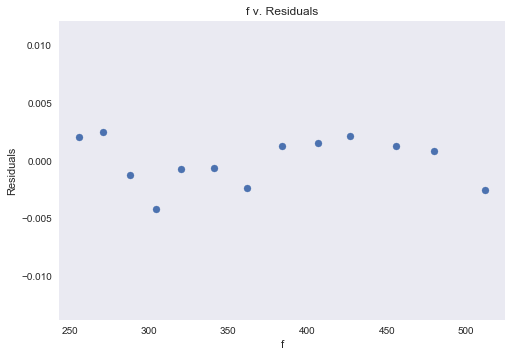

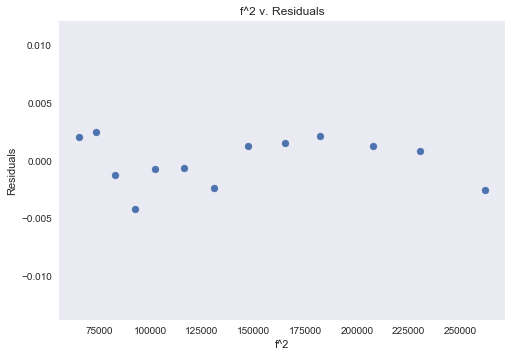

In [14]:
polynomial_model.residual_plots()

Both the regression line and the residual plots look a lot better. Our regression line is a lot closer to all the points and our residual plots both look random and without shape.